# Introdução Opencv
## Leitura de imagem:
Para fazer a leitura de imagens é utilizado o método cv.imread()


In [ ]:
import numpy as np
import cv2 as cv
#carrega imagem em escala cinza
img= cv.imread('python.jpeg',0)

cv.imshow('image',img)
cv.waitKey(0)
cv.destroyAllWindows()

Obs: Opencv utiliza o padrão BRG o matplotlib utliza RGB. Logo para utilizar os dois em conjunto é necessário fazer algumas conversões, observer que a imagem exibida sem a conversão apresenta uma inversão em suas cores devido a não inversão. Próximo demonstra isto exemplo:

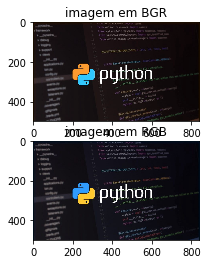

In [11]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import cv2 as cv
#carrega imagem em escala cinza
img= cv.imread('python.jpeg')

plt.figure(1)
plt.subplot(211)
plt.imshow(img)
plt.title("imagem em BGR")

img_rgb = cv.cvtColor(img,cv.COLOR_BGR2RGB)

plt.subplot(212)
plt.imshow(img_rgb)
plt.title("imagem em RGB")


plt.show()


## Leitura de video
Para se fazer a leitura de video é necessário utilizar a web can ou um arquivo de video. 

In [ ]:
%matplotlib inline
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

cap = cv.VideoCapture('video.mp4')
if not cap.isOpened():
    print("Não foi possivel abrir")
    exit()
    
while True:
    #coleta frame-a-frame
    ret, frame = cap.read()
    
    if not ret:
        print("não foi recebido nenhuma imagem... encerrando")
        breal
    
    gray = cv.cvtColor(frame,cv.COLOR_BGR2GRAY)

    cv.imshow('frame', gray)
    if cv.waitKey(1) == ord('q'):
        break

cap.release()
cv.destroyAllWindows()

## Desenhando na Imagem:
Para desenhar figuras geométricas utilizando openCV basta utilziar as funções:
* cv.line()
* cv.circle()
* cv.rectangle()
...

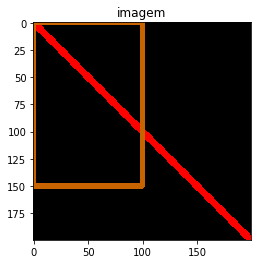

In [14]:
%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np
import cv2 as cv

img = np.zeros((200,200,3), np.uint8)

cv.line(img, (0,0), (199,199), (255,0,0),5)
cv.rectangle(img,(0,0),(100,150),(200,100,0),3)
plt.figure(1)
plt.imshow(img)
plt.title('imagem')
plt.show()


## ROI:
Trata-se de uma região de uma imagem:

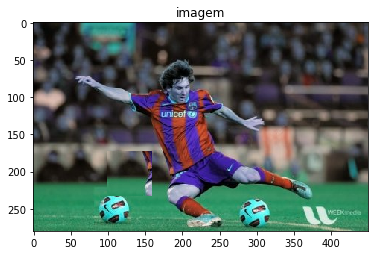

In [15]:
%matplotlib inline
import numpy as np
import cv2 as cv

img = cv.imread("messi.jpg")

roi = img[180:240, 130:190]

img[173:233, 100:160] = roi

plt.imshow(img)
plt.title('imagem')
plt.show()

A ROI será utilizado no proximo exemplo para sobrepor duas imagens utilizando operações binárias(Bitwise)

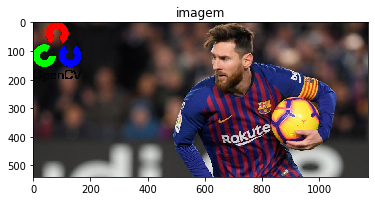

In [10]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import cv2 as cv

img1 = cv.imread('messi2.jpg')
img2 = cv.imread('opencv1.png')

#seleciona parte da imagem1 tendo como 
#base as dimensões da img2
rows,cols, channels = img2.shape
roi = img1[0:rows, 0:cols]

#cria a mascara:
img2gray = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
ret, mask = cv.threshold(img2gray,2 ,255, cv.THRESH_BINARY)
mask_inv = cv.bitwise_not(mask)

#coloca a a mascara na ROI 
img1_bk = cv.bitwise_and(roi,roi,mask= mask_inv)

#pega apenas a parta da logo da imagem
img2_fg = cv.bitwise_and(img2,img2, mask = mask)



#coloca a logo
dst = cv.add(img1_bk, img2_fg)
img1[0:rows, 0:cols] = dst

#converte para rgb:
img_rgb = cv.cvtColor(img1,cv.COLOR_BGR2RGB)



plt.imshow(img_rgb)
plt.title('imagem')
plt.show()




### TrashHold
A operação de threshold é essencial nesse processo. A função destaca apenas a informação necessar que se
deseja da imagem. Existem diferentes tipos de treshhold como segue no exemplo: 

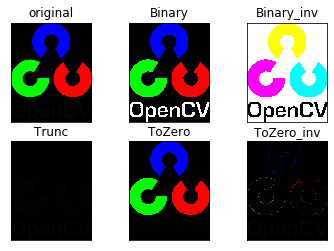

In [16]:
%matplotlib inline
import cv2 as cv
import numpy as numpy
from  matplotlib import pyplot as plt 

img = cv.imread('opencv1.png')

img_gray = cv.cvtColor(img,cv.COLOR_BGRA2GRAY)

ret, thresh1 = cv.threshold(img,4,255,cv.THRESH_BINARY)
ret, thresh2 = cv.threshold(img,4,255,cv.THRESH_BINARY_INV)
ret, thresh3 = cv.threshold(img,4,255,cv.THRESH_TRUNC)
ret, thresh4 = cv.threshold(img,200,255,cv.THRESH_TOZERO)
ret, thresh5 = cv.threshold(img,200,255,cv.THRESH_TOZERO_INV)

titulos = ["original","Binary", "Binary_inv", "Trunc", "ToZero","ToZero_inv"]
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i],"gray")
    plt.title(titulos[i])
    plt.xticks([]),plt.yticks([])

plt.show()

## Color Space
Existem mais 150 tipos de métodos para definir color-space. As  conversões mais utilizados são os BRG <-> Gray e BGR<-> HSV

### HSB
HSB: Hue(matriz), Saturation(Saturação) e value(Valor).
* Matriz(tonalidade):Especifica do tipo de cor. Valores de 0 a 179.
* Saturação: Quanto menor o valor, mais com cinza aparecerá a imagem. Valores de 0 a 255
* Valor: Define o Brilho da cor. Atinge valores de 0 a 255.

### Mapeamento de Objetos:
HSB é maisples para representar cores e por issso será utilizado nesse processo. No proximo exemplo será extraido um objeto azul da imagem seguindo os passos:
* Pega cada frame do video.
* converte de BGR para HRV.